In [ ]:
!git clone -b mixtral https://github.com/cg123/mergekit.git
!cd mergekit && pip install -qqq -e . --progress-bar off
!pip install -qqq -U transformers --progress-bar off

Cloning into 'mergekit'...
remote: Enumerating objects: 1033, done.
remote: Counting objects: 100% (557/557), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 1033 (delta 437), reused 372 (delta 334), pack-reused 476
Receiving objects: 100% (1033/1033), 274.19 KiB | 3.30 MiB/s, done.
Resolving deltas: 100% (693/693), done.


In [ ]:
merge_config = """
base_model: mistralai/Mistral-7B-Instruct-v0.2
dtype: float16
gate_mode: cheap_embed
experts:
  - source_model: HuggingFaceH4/zephyr-7b-beta
    positive_prompts: ["You are an helpful general-pupose assistant."]
  - source_model: mistralai/Mistral-7B-Instruct-v0.2
    positive_prompts: ["You are helpful assistant."]
  - source_model: teknium/OpenHermes-2.5-Mistral-7B
    positive_prompts: ["You are helpful a coding assistant."]
  - source_model: meta-math/MetaMath-Mistral-7B
    positive_prompts: ["You are an assistant good at math."]
"""

with open('config.yaml', 'w') as f:
    f.write(merge_config)

#### The merge itself only requires a CPU but note that you will need a lot of space on your disk since we have to download all the experts.

In [ ]:
!mergekit-moe config.yaml merge --copy-tokenizer --allow-crimes --out-shard-size 1B --lazy-unpickle --trust-remote-code

Fetching 11 files:   0%|                                 | 0/11 [00:00<?, ?it/s]

model.safetensors.index.json: 100%|████████| 25.1k/25.1k [00:00<00:00, 8.55MB/s]


generation_config.json: 100%|███████████████████| 111/111 [00:00<00:00, 851kB/s]

Fetching 11 files:  18%|████▌                    | 2/11 [00:02<00:11,  1.26s/it]

pytorch_model.bin.index.json: 100%|████████| 23.9k/23.9k [00:00<00:00, 67.1MB/s]


tokenizer_config.json: 100%|███████████████| 1.46k/1.46k [00:00<00:00, 12.1MB/s]


special_tokens_map.json: 100%|████████████████| 72.0/72.0 [00:00<00:00, 334kB/s]


tokenizer.json:   0%|                               | 0.00/1.80M [00:00<?, ?B/s]


model-00003-of-00003.safetensors:   0%|             | 0.00/4.54G [00:00<?, ?B/s]



tokenizer.model:   0%|                               | 0.00/493k [00:00<?, ?B/s]




model-00001-of-00003.safetensors:   0%|             | 0.00/4.94G [00:00<?, ?B/s]





model-00002-of-00003.safetensors:   0%|             | 0.00/5.00G [00:00<?, ?B/s]

to

![image.png](attachment:34bf1f6a-de73-4bd6-9b90-7021669e3f9d.png)

#### Test inference and push the model to the HF Hub.

In [ ]:
!pip install bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 62.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 92.3 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


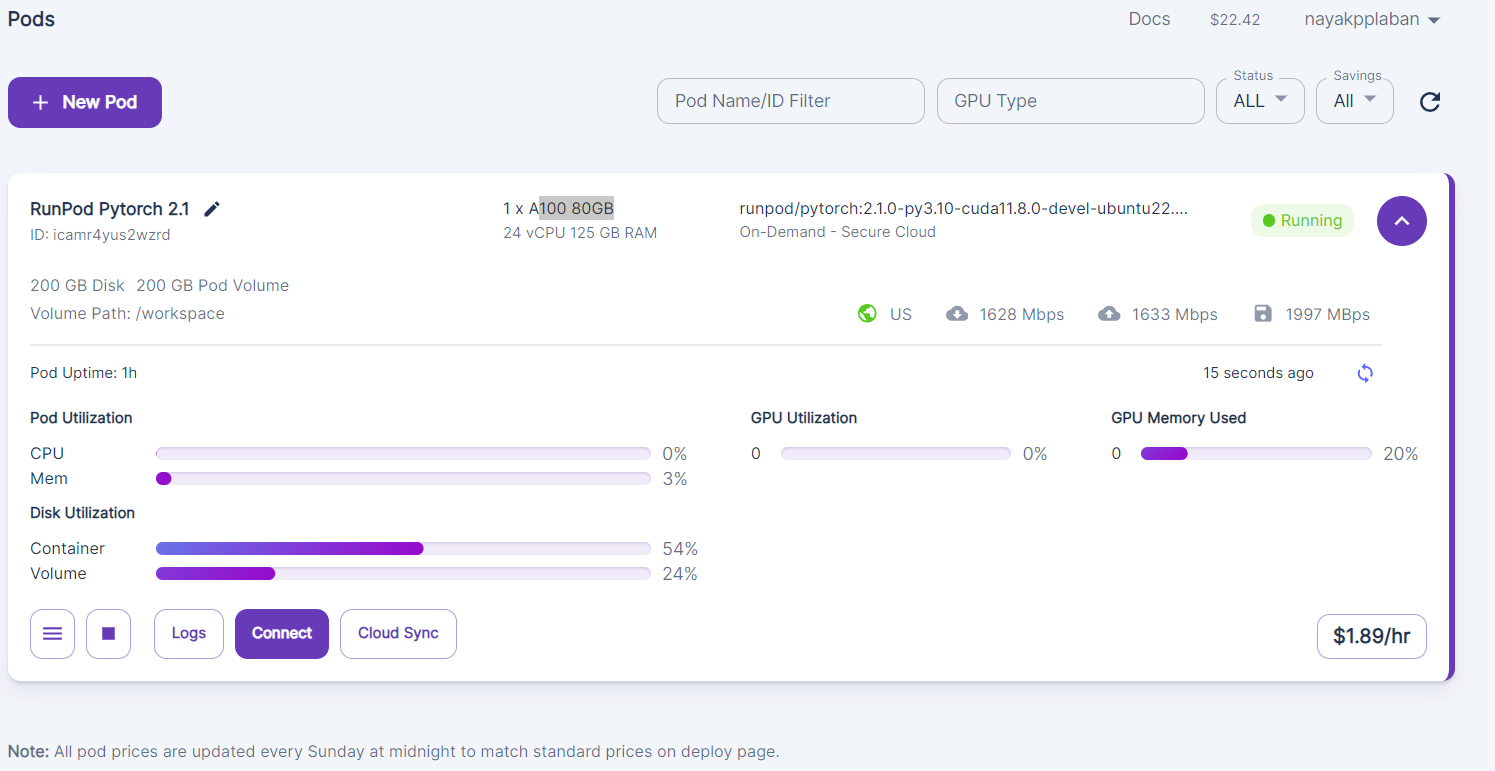

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained(
            "merge/", device_map='cpu', torch_dtype=torch.float16
)

Loading checkpoint shards:   0%|          | 0/25 [00:00<?, ?it/s]

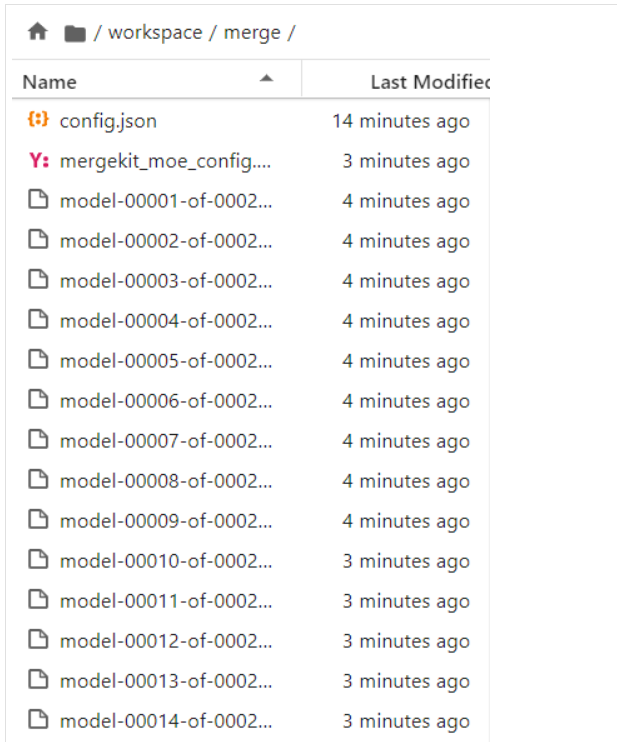

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
model.push_to_hub("Plaban81/Moe-4x7b-math-reason-code")
tokenizer.push_to_hub("Plaban81/Moe-4x7b-math-reason-code")

model-00002-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00005-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00004-of-00010.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00001-of-00010.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Upload 10 LFS files:   0%|          | 0/10 [00:00<?, ?it/s]

model-00006-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00007-of-00010.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00008-of-00010.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00009-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00010-of-00010.safetensors:   0%|          | 0.00/3.72G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Plaban81/Moe-4x7b-math-reason-code/commit/270896a7b8a802e2189976c1f4b7134ba1515492', commit_message='Upload tokenizer', commit_description='', oid='270896a7b8a802e2189976c1f4b7134ba1515492', pr_url=None, pr_revision=None, pr_num=None)

#### Test the Mixture of Experts Model

In [ ]:
from transformers import AutoTokenizer
import transformers
import torch

model = "Plaban81/Moe-4x7b-math-reason-code" #If you want to test your own model, replace this value with the model directory path

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    model_kwargs={"torch_dtype": torch.float16, "load_in_4bit": True},
)


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

model-00001-of-00010.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00004-of-00010.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00005-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00006-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00007-of-00010.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00008-of-00010.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00009-of-00010.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00010-of-00010.safetensors:   0%|          | 0.00/3.72G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/10 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

#### Helper Function to generate response

In [ ]:
def generate_resposne(query):
    messages = [{"role": "user", "content": query}]
    prompt = pipeline.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    outputs = pipeline(prompt, max_new_tokens=256, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
    return outputs[0]['generated_text']


#### Ask Query

In [ ]:
response = generate_resposne("How to cook pizza.Please provide a step by step procedure")

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.')
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:223: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference.')


In [ ]:
print(response)

<s>[INST] How to cook pizza.Please provide a step by step procedure [/INST]Cooking a pizza at home can be a fun and delicious experience. Here's a step-by-step procedure to help you make the perfect pizza:

Ingredients:
- Pizza dough (store-bought or homemade)
- Pizza sauce (store-bought or homemade)
- Shredded mozzarella cheese
- Your choice of toppings (pepperoni, mushrooms, onions, peppers, etc.)
- Olive oil
- Cornmeal or flour for dusting

Equipment:
- Pizza stone or baking sheet
- Parchment paper
- Rolling pin
- Spatula

Instructions:

1. Preheat the oven to 450°F (232°C) with a pizza stone or baking sheet inside. If using a pizza stone, place it on the bottom rack of the oven.

2. Dust a clean work surface with flour or cornmeal. Roll out the pizza dough to your desired thickness using a rolling pin.

3. Drizzle a little olive oil on the work surface and place the pizza dough on top


#### Ask Query 2

In [ ]:
response = generate_resposne("Write a python program to generate fibonnaci series.")
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s>[INST] Write a python program to generate fibonnaci series. [/INST] Here is a simple Python program that generates the Fibonacci series using a loop:

```python
def fibonacci(n):
    a, b = 0, 1
    for i in range(n):
        yield a
        a, b = b, a + b

numbers = fibonacci(10)

for number in numbers:
    print(number)
```

In this program, we define a generator function `fibonacci` that takes a single argument `n`. Inside the function, we initialize two variables `a` and `b` to 0 and 1, respectively. We then use a loop to generate the Fibonacci series up to the `n`th term. In each iteration of the loop, we yield the current value of `a` (which is the `i`th term of the series) and update `a` and `b` to prepare for the next iteration.

To test the function, we call it with an argument of 10, which generates the first 10 terms of the Fibonacci series. We then use a `for` loop to print each term


#### Ask Query 3

In [ ]:
response = generate_resposne("""Select the prime number from the list of numbers provided below.
[1,3,5,6,123,2000]""")
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s>[INST] Select the prime number from the list of numbers provided below.
[1,3,5,6,123,2000] [/INST] The prime numbers from the given list are 1, 3, and 5. However, 1 is not considered a prime number in mathematics as it is not greater than 1. Therefore, the only prime number from the list is 3. The other numbers, 6, 123, and 2000, are not prime numbers.


In [ ]:
response = generate_resposne("""Write an essay on Indusriatlization within 500 words.""")
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s>[INST] Write an essay on Indusriatlization within 500 words. [/INST] Indusriatlization refers to the process of transforming a traditional agricultural economy into a modern industrial one. This transition, which began in the 19th century, has had a profound impact on the socio-economic development of India. In this essay, we will examine the historical context of Indusriatlization, its key drivers, and its effects on various sectors of the Indian economy.

Historical Context

The British colonization of India in the 19th century laid the foundation for Indusriatlization in the country. The British, who were interested in India's vast market and resources, introduced modern industries such as textiles, iron and steel, and coal mining. They also established modern institutions such as technical schools, research institutes, and factories. The British also implemented policies such as the Doctrine of Lapse, which enabled them to annex Indian princely states, and the Indian Penal Code,

In [ ]:
response = generate_resposne("""what is square root of 81 + square root of 9""")
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s>[INST] what is square root of 81 + square root of 9 [/INST] The square root of 81 is 9 (since 9^2 = 81), and the square root of 9 is 3 (since 3^2 = 9). Therefore, the expression simplifies to 9 + 3, or 12.


#### AutoEvaluation Results

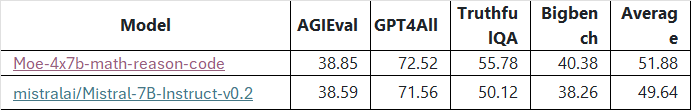

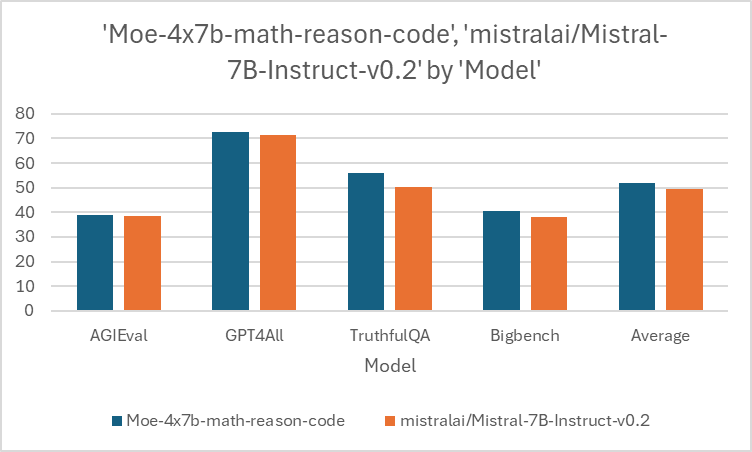

* As we can see, the merged Moe-4x7b-math-reason-code slightly outperformed the base Mistral-7B-Instruct-v0.2 on the AGIEval, GPT4ALL,TruthfulQA, and BigBench, resulting in a higher average score of 51.88.

#### Link to the evaluation Results
https://gist.github.com/plaban1981/a9163f4d2e02f5e36aa6c429529c5088